In [1]:
# jupyter notebook go wide screen
# go wide screen
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# update matplotlib params for bigger font
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import glob
import pickle
import numpy as np
import os
from sklearn.decomposition import PCA

"""Applies PCA on mean IFU spectrum (for each IFU) and computes corresponding quasi principal components
for one fiber in each amplifier."""

'Applies PCA on mean IFU spectrum (for each IFU) and computes corresponding quasi principal components\nfor one fiber in each amplifier.'

## functions for loading and saving sky spectra

In [3]:
def load_skys(ff,which="sky_spectrum"): # loads rebinned sky spectra from pickle files
    skys = {}
    shotids = []
    N = len(ff)
    sff = []
    for i,f in enumerate(ff):
        if i % 100 == 0:
            print("loading {} out of {}.".format(i,N))
        #print(f)
        shotid = f.split("/")[6]
        exp = f.split("/")[7]
        ifu = f.split("/")[8][10:13]
        amp = f.split("/")[8][18:20]
        #print(shotid, exp, ifu, amp)
        fiber = 50
        try:
            ww,rb = pickle.load( open(f,'rb'), encoding='iso-8859-1' )
            skys[(shotid,exp,ifu,amp)] = rb[which][fiber]/rb["fiber_to_fiber"][fiber]
            sff.append(f)
        except:
            print("Error loading {}.".format(f))
            pass
    print("starting wl = ", ww[0], "A")
    return ww, skys, sff

def save_sky(IFU, amp , k, pca_sky, PLOT=False): # saves new spectra in pickle files #/data/hetdex/u/mxhf/rebin/20170331v006/exp01
    pattern='/data/hetdex/u/mxhf/rebin/{}/{}/multi_???_{}_???_{}_rebin.pickle' #"pca_test/rebin/{}/{}/multi_???_{}_???_{}_rebin.pickle"
    shotid, exp = k

    _pattern = pattern.format(shotid, exp, IFU, amp)
    ff = glob.glob(_pattern)
    if not len(ff) == 1:
        print("ERROR: Did not find files like {}".format(_pattern))
        return
    fname = ff[0]

    h,t = os.path.split(fname)
    #pca_fname = os.path.join(h,"pca_" + t)
    h2 = 'tmp/{}/{}'.format(shotid, exp)
    pca_fname = os.path.join(h2,"meanpca_" + t)

    ww,rb = pickle.load( open(fname,'rb'), encoding='iso-8859-1' )
    #rb["fiber_to_fiber"] = rb["fiber_to_fiber"][:,:N]
    rb["pca_sky_spectrum"] = rb["sky_spectrum"].copy()
    #b["pca_sky_spectrum"][:,:N][:,ii] = pca_sky * rb["fiber_to_fiber"][:,:N][:,ii] 
    rb["pca_sky_spectrum"] = pca_sky * rb["fiber_to_fiber"]
    
    vmin, vmax = -20, 20
    
    if PLOT:
        plt.figure(figsize=(15,5))
        plt.subplot(211)
        plt.imshow(rb["sky_subtracted"], vmin=vmin, vmax=vmax, aspect="auto", interpolation="none")
        plt.title("sky_subtracted")
        plt.subplot(212)
        plt.imshow(rb['sky_subtracted'] + rb['sky_spectrum'] - rb['pca_sky_spectrum'], vmin=vmin, vmax=vmax, aspect="auto", interpolation="none")
        plt.title("pca sky_subtracted")

    ### HIER
    rb['sky_subtracted'] = rb['sky_subtracted'] + rb['sky_spectrum'] - rb['pca_sky_spectrum']

    if PLOT:
        return
    else:
        pickle.dump(  ( ww,rb), open(pca_fname,'wb') , protocol=2   )
        print("Wrote ", pca_fname)

In [4]:
cosmosshots = ["20180110v021","20180113v013","20180114v013","20180120v008","20180123v009",
               "20180124v010","20180209v009","20180210v006"]
""" cosmos shots
20171220v015
20171221v016
20171222v013
20171225v015
---
20180110v021
20180113v013
20180114v013
20180120v008
20180123v009
20180124v010
20180209v009
20180210v006"""


' cosmos shots\n20171220v015\n20171221v016\n20171222v013\n20171225v015\n---\n20180110v021\n20180113v013\n20180114v013\n20180120v008\n20180123v009\n20180124v010\n20180209v009\n20180210v006'

In [5]:
# find names of all IFUs
ff_1 = glob.glob("/data/hetdex/u/mxhf/rebin/2018????v???/exp0?/multi_???_???_???_??_rebin.pickle")
ifus = []
for f in ff_1:
    ifu = f.split("/")[8][10:13]
    ifus.append(ifu)
ifus = np.unique(ifus)
print("ifus: ", ifus)

amps = ["LL","LU","RL","RU"]

ifus:  ['013' '015' '021' '022' '023' '024' '025' '026' '027' '032' '033' '034'
 '035' '036' '037' '042' '043' '044' '045' '046' '047' '052' '053' '057'
 '062' '063' '067' '072' '073' '074' '075' '076' '077' '082' '083' '084'
 '085' '086' '087' '092' '093' '094' '095' '096' '097' '103' '104' '105'
 '106']


## get sky spectra in all 2018 shots for one amp (022 LL)

In [6]:
ifuslot, amp = "022", "LL"

In [7]:
ff_022_LL = glob.glob("/data/hetdex/u/mxhf/rebin/2018????v???/exp0?/multi_???_{}_???_LL_rebin.pickle".format(ifuslot)) #np.concatenate([ff_022_LL1,ff_022_LL2,ff_022_LL3]) #
ff_022_LU = glob.glob("/data/hetdex/u/mxhf/rebin/2018????v???/exp0?/multi_???_{}_???_LU_rebin.pickle".format(ifuslot))
ff_022_RL = glob.glob("/data/hetdex/u/mxhf/rebin/2018????v???/exp0?/multi_???_{}_???_RL_rebin.pickle".format(ifuslot))
ff_022_RU = glob.glob("/data/hetdex/u/mxhf/rebin/2018????v???/exp0?/multi_???_{}_???_RU_rebin.pickle".format(ifuslot))

skys = {}
ww,skys[("022","LL")],sff = load_skys(ff_022_LL,which="sky_spectrum")
ww,skys[("022","LU")],sff = load_skys(ff_022_LU,which="sky_spectrum")
ww,skys[("022","RL")],sff = load_skys(ff_022_RL,which="sky_spectrum")
ww,skys[("022","RU")],sff = load_skys(ff_022_RU,which="sky_spectrum")

# keys for each amplifier
keysLL = np.array([x for x in skys[("022","LL")].keys()])
keysLU = np.array([x for x in skys[("022","LU")].keys()])
keysRL = np.array([x for x in skys[("022","RL")].keys()])
keysRU = np.array([x for x in skys[("022","RU")].keys()])

print("key shapes: ", keysLL.shape, keysLU.shape, keysRL.shape, keysRU.shape)
keykey = {"LL":keysLL,"LU":keysLU,"RL":keysRL,"RU":keysRU}

ampkey = keykey[amp]


loading 0 out of 1583.
loading 100 out of 1583.
loading 200 out of 1583.
loading 300 out of 1583.
loading 400 out of 1583.


/afs/ipp/.cs/anaconda/amd64_generic/3/5.3.0/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


loading 500 out of 1583.
loading 600 out of 1583.
loading 700 out of 1583.
loading 800 out of 1583.
loading 900 out of 1583.
Error loading /data/hetdex/u/mxhf/rebin/20180520v010/exp01/multi_317_022_039_LL_rebin.pickle.
loading 1000 out of 1583.
loading 1100 out of 1583.
Error loading /data/hetdex/u/mxhf/rebin/20180523v017/exp03/multi_317_022_039_LL_rebin.pickle.
loading 1200 out of 1583.
loading 1300 out of 1583.
loading 1400 out of 1583.
loading 1500 out of 1583.
Error loading /data/hetdex/u/mxhf/rebin/20180513v013/exp01/multi_317_022_039_LL_rebin.pickle.
starting wl =  3494.74 A
loading 0 out of 1569.
loading 100 out of 1569.
loading 200 out of 1569.
loading 300 out of 1569.
loading 400 out of 1569.
loading 500 out of 1569.
loading 600 out of 1569.
loading 700 out of 1569.
loading 800 out of 1569.
loading 900 out of 1569.
loading 1000 out of 1569.
loading 1100 out of 1569.
loading 1200 out of 1569.
loading 1300 out of 1569.
loading 1400 out of 1569.
loading 1500 out of 1569.
starting

### fiber A: mean sky spectrum of the whole ifu

In [8]:
# stack -> mean spectrum of IFU for each exposure
stack = []
for key in ampkey:
    i=+1
    tmp = []
    key=tuple(key)
    try:
        tmp.append(skys[("022","LL")][(key[0],key[1],key[2],"LL")])
    except KeyError:
        pass
    try:
        tmp.append(skys[("022","LU")][(key[0],key[1],key[2],"LU")])
    except KeyError:
        pass
    try:
        tmp.append(skys[("022","RL")][(key[0],key[1],key[2],"RL")])
    except KeyError:
        pass
    try:
        tmp.append(skys[("022","RU")][(key[0],key[1],key[2],"RU")])
    except KeyError:
        pass

    stack.append(np.nanmean(tmp, axis=0))

stack = np.array(stack)
print("shape stack ",stack.shape)

f1 = stack

f1[np.isnan(f1)]=1

k1 = ampkey

shape stack  (1580, 1010)


cut out bright and low-count exposures

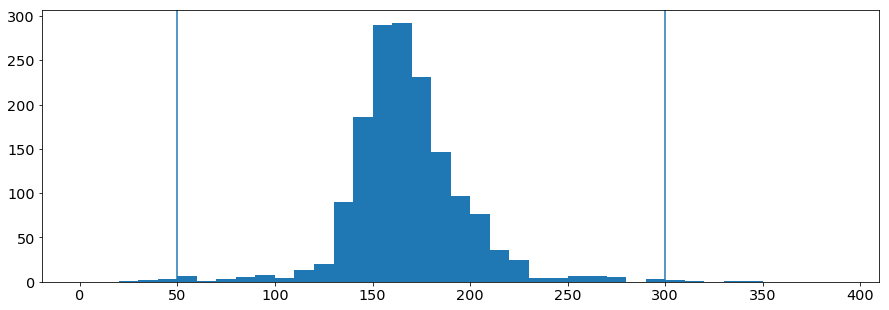

In [9]:
meanmean = np.nanmean(f1[:,450:750], axis=1)
meanmin=50
meanmax=300

ii = (meanmean>=meanmin)&(meanmean<=meanmax)

# only use exposures with nice means and adjust keys
fcut = f1[ii]
kcut= k1[ii]

plt.figure(figsize=(15,5))
plt.hist(meanmean, bins=np.arange(0,400,10))
plt.axvline(meanmin)
plt.axvline(meanmax)

In [10]:
# get indices and keys for cosmos shots

cosmosind = []
cosmoskeys=[]
for i in range(len(kcut)):
    if kcut[i][0] in cosmosshots:
        cosmosind.append(i)
        cosmoskeys.append(kcut[i])

normalize spectra along wavelength axis

In [11]:
# normalize spectra

STDDIV = False

meanf = np.nanmean(fcut, axis=0)

if STDDIV:
    stdf = np.nanstd(fcut, axis=0)
else:
    stdf = 1

fmid = (fcut - meanf)/stdf

fmid[np.isnan(fmid)] = 1


apply PCA to fiber A (mean spectrum)

In [12]:
# apply PCA
pca=None
ncomp = 20
pca = PCA(n_components=ncomp)

pca.fit(fmid)

tA = pca.transform(fmid)
tA.shape

(1560, 20)

Text(0,0.5,'explained variance ratio')

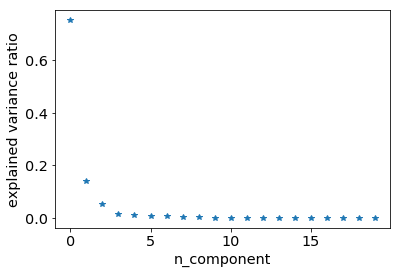

In [13]:
plt.figure()
plt.plot(pca.explained_variance_ratio_, "*")
plt.xlabel("n_component")
plt.ylabel("explained variance ratio")

get spectra from one amplifier and normalize them

In [14]:
# get spectra from one amplifier and normalize them
f2 = np.array([x for x in skys[("022",amp)].values()])
f2.shape

fcut2 = f2[ii]
fcut2.shape

meanf2 = np.nanmean(fcut2, axis=0)

if STDDIV:
    stdf2 = np.nanstd(fcut2,axis=0)
else:
    stdf2 = 1
    
fmid2 = (fcut2-meanf2)/stdf2

fmid2[np.isnan(fmid2)] = 1

get axes of fiber spectra with norm 1 

In [15]:
fnorm = fmid.copy()
for i in range(fnorm.shape[0]):
    fnorm /= np.linalg.norm(fnorm)

fnorm2 = fmid2.copy()
for i in range(fnorm2.shape[0]):
    fnorm2 /= np.linalg.norm(fnorm2)

### quasi PCs

$P$ : pca.components_ of fiber A, $\in \mathbb{R}^{k\times m}$  ($k$ components, $m=1032$)

$\widetilde{P}_y$ : quasi components of fiber B, $\in \mathbb{R}^{k\times m}$  ($k$ components, $m=1032$)

$X$ : sky spectra (normalized) of fiber A, $\in\mathbb{R}^{n \times m}$ for n sky spectra

$Y$ : sky spectra (normalized) of fiber B, $\in\mathbb{R}^{n \times m}$ for n sky spectra

$\widetilde{P}_y = P \cdot \hat X^T \cdot \hat Y$

so that for each quasi component $\widetilde{p}_i^y = \sum_j{ <p_i^x, \hat x_j> \hat y_j}$.


Since they won't be unit vectors, divide by the norm.

In [16]:
# get quasi PCs
quasis = pca.components_ @ fnorm.T @ fnorm2
qstd = quasis.copy()

# turn them into unit vectors
for i in range(quasis.shape[0]):
    qstd[i] = (qstd[i]-np.nanmean(qstd[i]))/np.nanstd(qstd[i])*np.nanstd(pca.components_[i])+np.nanmean(pca.components_[i])
    quasis[i]/= np.linalg.norm(quasis[i])

Text(0.5,1,'$\\widetilde{P} \\cdot \\widetilde{P}^T$')

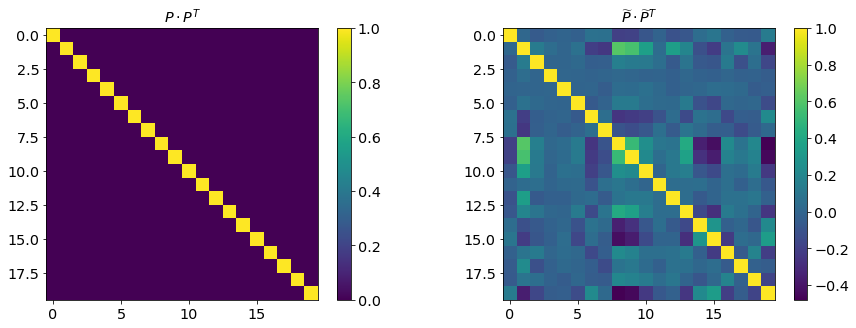

In [23]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.imshow(pca.components_@pca.components_.T)
plt.colorbar()
plt.title(r"$P \cdot P^T$")
plt.subplot(122)
plt.imshow(qstd@qstd.T)
plt.colorbar()
plt.title(r"$\widetilde{P} \cdot \widetilde{P}^T$")

new sky spectrum

In [24]:
# get new sky spectrum 
qnew = ( tA @ qstd )*stdf2 + meanf2

In [25]:
print("rel res cosmos shots: ",np.nanstd((fcut2[cosmosind]-qnew[cosmosind])/fcut[cosmosind], axis=1).mean())

rel res cosmos shots:  0.009705001516670414


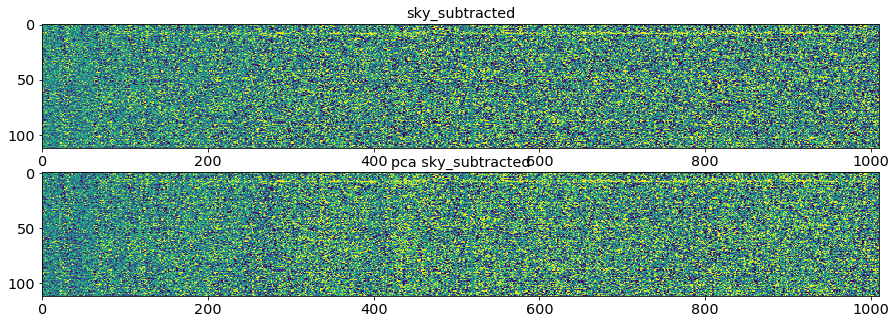

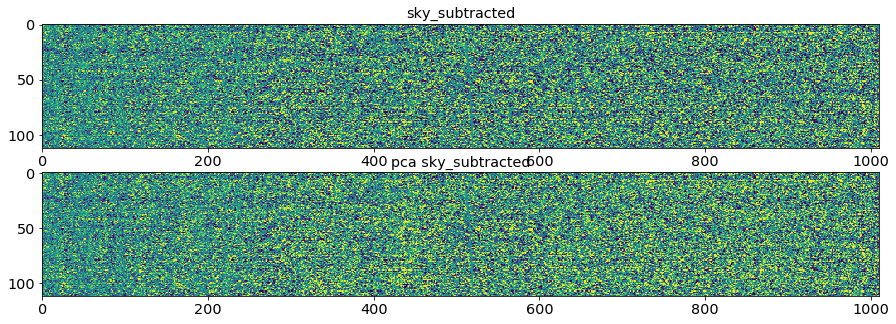

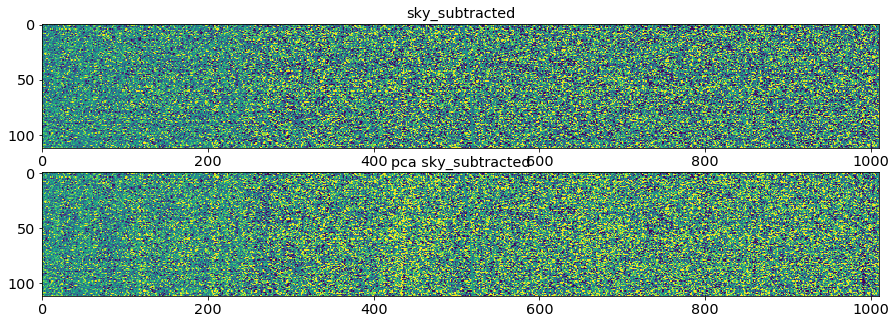

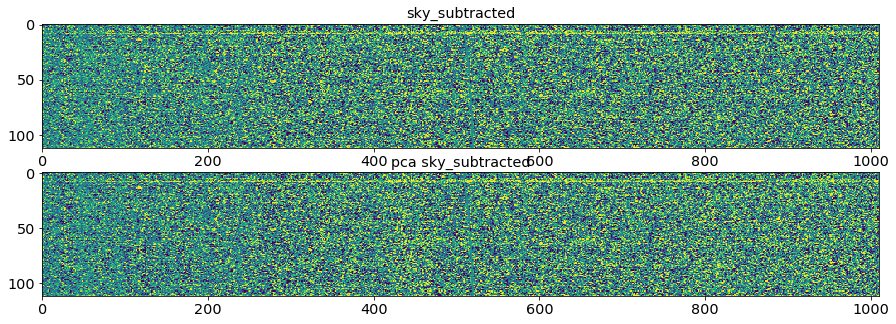

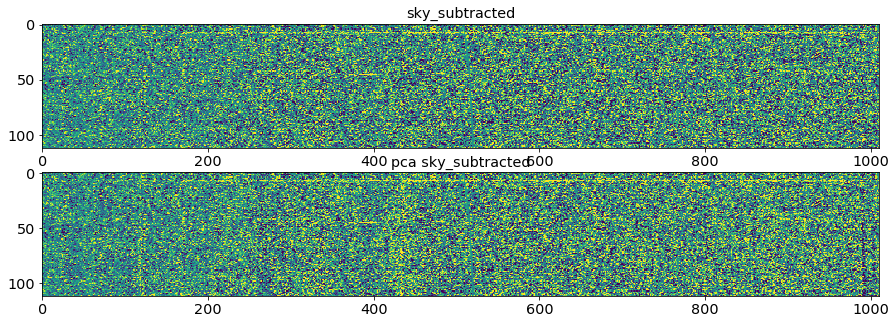

In [27]:
# save new sky spectra of cosmos shots in pickle files
for i in range(len(cosmoskeys))[::5]:
    pca_sky = qnew[cosmosind[i]]
    key = cosmoskeys[i]
    k = (key[0],key[1])
    IFU = key[2]
    amp = key[3]
    save_sky(IFU, amp , k, pca_sky, PLOT=True)